
## Gibbs Sampling Code

This is the sample code posted by Professor Jairo Fúquene Patiño. The settings of prior and observed data is given below:

In [6]:
# prior
mu0<-1.9  ; t20<-0.95^2
s20<-.01 ; nu0<-1

# data
y<-c(1.64,1.70,1.72,1.74,1.82,1.82,1.82,1.90,2.08)
n<-length(y) ; mean.y<-mean(y) ; var.y<-var(y)


### Discrete approximations

Letting $\tilde{\sigma}^{2}=1 / \sigma^{2}$ be the precision, recall that the posterior distribution of $\left\{\theta, \tilde{\sigma}^{2}\right\}$ is equal to the joint distribution of $\left\{\theta, \sigma^{2}, y_{1}, \ldots, y_{n}\right\}$, divided by $p\left(y_{1}, \ldots, y_{n}\right)$, which does not depend on the parameters. Therefore the relative posterior probabilities of one set of parameter values $\left\{\theta_{1}, \tilde{\sigma}_{1}^{2}\right\}$ to another $\left\{\theta_{2}, \tilde{\sigma}_{2}^{2}\right\}$ is directly computable:
$$\begin{aligned} \frac{p\left(\theta_{1}, \tilde{\sigma}_{1}^{2} \mid y_{1}, \ldots, y_{n}\right)}{p\left(\theta_{2}, \tilde{\sigma}_{2}^{2} \mid y_{1}, \ldots, y_{n}\right)} &=\frac{p\left(\theta_{1}, \tilde{\sigma}_{1}^{2}, y_{1}, \ldots, y_{n}\right) / p\left(y_{1}, \ldots, y_{n}\right)}{p\left(\theta_{2}, \tilde{\sigma}_{2}^{2}, y_{1}, \ldots, y_{n}\right) / p\left(y_{1}, \ldots, y_{n}\right)} \\ &=\frac{p\left(\theta_{1}, \tilde{\sigma}_{1}^{2}, y_{1}, \ldots, y_{n}\right)}{p\left(\theta_{2}, \tilde{\sigma}_{2}^{2}, y_{1}, \ldots, y_{n}\right)} \end{aligned}$$
The joint distribution is easy to compute as it was built out of standard prior and sampling distributions:
$$\begin{aligned}
p\left(\theta, \tilde{\sigma}^{2}, y_{1}, \ldots, y_{n}\right)=& p\left(\theta, \tilde{\sigma}^{2}\right) \times p\left(y_{1}, \ldots, y_{n} \mid \theta, \tilde{\sigma}^{2}\right) \\
=& \operatorname{dnorm}\left(\theta, \mu_{0}, \tau_{0}\right) \times \operatorname{dgamma}\left(\tilde{\sigma}^{2}, \nu_{0} / 2, \nu_{0} \sigma_{0}^{2} / 2\right) \times \prod_{i=1}^{n} \operatorname{dnorm}\left(y_{i}, \theta, 1 / \sqrt{\tilde{\sigma}^{2}}\right) .
\end{aligned}$$
A discrete approximation to the posterior distribution makes use of these facts by constructing a posterior distribution over a grid of parameter values, based on relative posterior probabilities. This is done by evaluating $p\left(\theta, \tilde{\sigma}^{2}, y_{1}, \ldots, y_{n}\right)$ on a two-dimensional grid of values of $\left\{\theta, \tilde{\sigma}^{2}\right\}$. Letting $\left\{\theta_{1}, \ldots, \theta_{G}\right\}$ and $\left\{\tilde{\sigma}_{1}^{2}, \ldots, \tilde{\sigma}_{H}^{2}\right\}$ be sequences of evenly spaced parameter values, the discrete approximation to the posterior distribution assigns a posterior probability to each pair $\left\{\theta_{k}, \tilde{\sigma}_{l}^{2}\right\}$ on the grid, given by
$$\begin{aligned} p_{D}\left(\theta_{k}, \tilde{\sigma}_{l}^{2} \mid y_{1}, \ldots, y_{n}\right) &=\frac{p\left(\theta_{k}, \tilde{\sigma}_{l}^{2} \mid y_{1}, \ldots, y_{n}\right)}{\sum_{g=1}^{G} \sum_{h=1}^{H} p\left(\theta_{g}, \tilde{\sigma}_{h}^{2} \mid y_{1}, \ldots, y_{n}\right)} \\ &=\frac{p\left(\theta_{k}, \tilde{\sigma}_{l}^{2}, y_{1}, \ldots, y_{n}\right) / p\left(y_{1}, \ldots, y_{n}\right)}{\sum_{g=1}^{G} \sum_{h=1}^{H} p\left(\theta_{g}, \tilde{\sigma}_{h}^{2}, y_{1}, \ldots, y_{n}\right) / p\left(y_{1}, \ldots, y_{n}\right)} \\ &=\frac{p\left(\theta_{k}, \tilde{\sigma}_{l}^{2}, y_{1}, \ldots, y_{n}\right)}{\sum_{g=1}^{G} \sum_{h=1}^{H} p\left(\theta_{g}, \tilde{\sigma}_{h}^{2}, y_{1}, \ldots, y_{n}\right)} . \end{aligned}$$
This is a real joint probability distribution for $\theta \in\left\{\theta_{1}, \ldots, \theta_{G}\right\}$ and $\tilde{\sigma}^{2} \in$ $\left\{\tilde{\sigma}_{1}^{2}, \ldots, \tilde{\sigma}_{H}^{2}\right\}$, in the sense that it sums to 1. In fact, it is the actual posterior distribution of $\left\{\theta, \tilde{\sigma}^{2}\right\}$ if the joint prior distribution for these parameters is discrete on this grid.


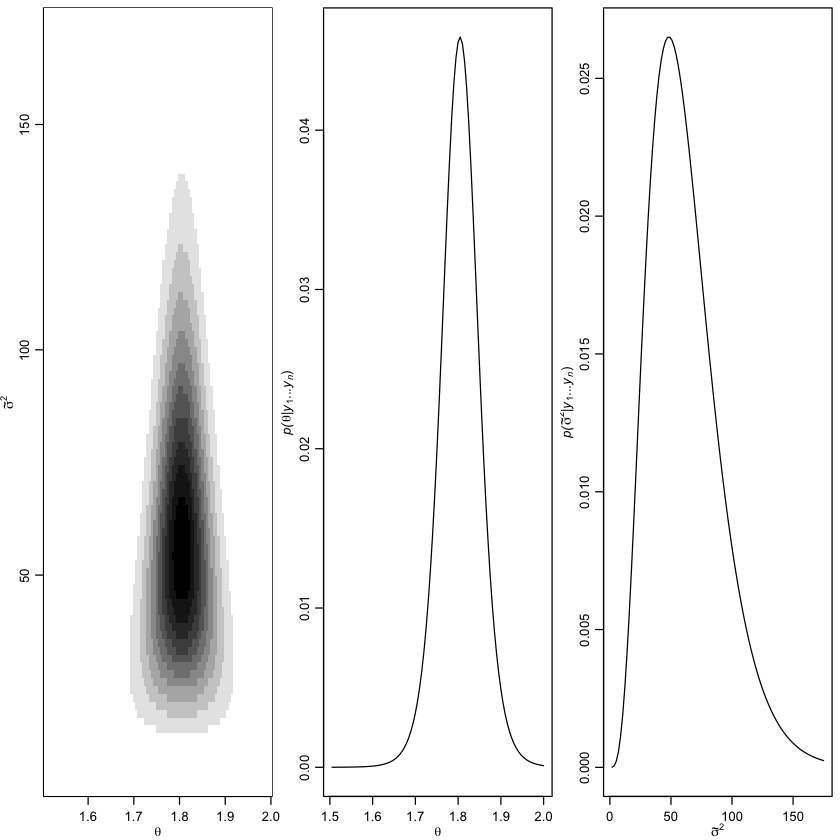

In [7]:

# grid 
G<-100 ; H<-100

mean.grid<-seq(1.505,2.00,length=G) 
prec.grid<-seq(1.75,175,length=H) 

post.grid<-matrix(nrow=G,ncol=H)

for(g in 1:G) {
  for(h in 1:H) { 
    
    post.grid[g,h]<- dnorm(mean.grid[g], mu0, sqrt(t20)) *
                     dgamma(prec.grid[h], nu0/2, s20*nu0/2 ) *
                     prod( dnorm(y,mean.grid[g],1/sqrt(prec.grid[h])) )
                  }
                }

post.grid<-post.grid/sum(post.grid)

par(mfrow=c(1,3),mar=c(2.75,2.75,.5,.5),mgp=c(1.70,.70,0))
image( mean.grid,prec.grid,post.grid,col=gray( (10:0)/10 ),
     xlab=expression(theta), ylab=expression(tilde(sigma)^2) )

mean.post<- apply(post.grid,1,sum)
plot(mean.grid,mean.post,type="l",xlab=expression(theta),
 ylab=expression( paste(italic("p("),
     theta,"|",italic(y[1]),"...",italic(y[n]),")",sep="")))

prec.post<-apply(post.grid,2,sum)
plot(prec.grid,prec.post,type="l",xlab=expression(tilde(sigma)^2),
     ylab=expression( paste(italic("p("),
     tilde(sigma)^2,"|",italic(y[1]),"...",italic(y[n]),")",sep=""))) 

### Gibbs sampling: two parameters

Suppose for the moment you knew the value of $\theta$. The conditional distribution of $\tilde{\sigma}^{2}$ given $\theta$ and $\left\{y_{1}, \ldots, y_{n}\right\}$ is
$$\begin{aligned} p\left(\tilde{\sigma}^{2} \mid \theta, y_{1}, \ldots, y_{n}\right) & \propto p\left(y_{1}, \ldots, y_{n}, \theta, \tilde{\sigma}^{2}\right) \\ &=p\left(y_{1}, \ldots, y_{n} \mid \theta, \tilde{\sigma}^{2}\right) p\left(\theta \mid \tilde{\sigma}^{2}\right) p\left(\tilde{\sigma}^{2}\right) \end{aligned}$$
If $\theta$ and $\tilde{\sigma}^{2}$ are independent in the prior distribution, then $p\left(\theta \mid \tilde{\sigma}^{2}\right)=p(\theta)$ and
$$\begin{aligned} p\left(\tilde{\sigma}^{2} \mid \theta, y_{1}, \ldots, y_{n}\right) \propto & p\left(y_{1}, \ldots, y_{n} \mid \theta, \tilde{\sigma}^{2}\right) p\left(\tilde{\sigma}^{2}\right) \\ \propto &\left(\left(\tilde{\sigma}^{2}\right)^{n / 2} \exp \left\{-\tilde{\sigma}^{2} \sum_{i=1}^{n}\left(y_{i}-\theta\right)^{2} / 2\right\}\right) \times \\ &\left(\left(\tilde{\sigma}^{2}\right)^{\nu_{0} / 2-1} \exp \left\{-\tilde{\sigma}^{2} \nu_{0} \sigma_{0}^{2} / 2\right\}\right) \\=&\left(\tilde{\sigma}^{2}\right)^{\left(\nu_{0}+n\right) / 2-1} \times \exp \left\{-\tilde{\sigma}^{2} \times\left[\nu_{0} \sigma_{0}^{2}+\sum\left(y_{i}-\theta\right)^{2}\right] / 2\right\} . \end{aligned}$$
This is the form of a gamma density, and so evidently $\left\{\sigma^{2} \mid \theta, y_{1}, \ldots, y_{n}\right\} \sim$ inverse-gamma $\left(\nu_{n} / 2, \nu_{n} \sigma_{n}^{2}(\theta) / 2\right)$, where
$$\nu_{n}=\nu_{0}+n, \quad \sigma_{n}^{2}(\theta)=\frac{1}{\nu_{n}}\left[\nu_{0} \sigma_{0}^{2}+n s_{n}^{2}(\theta)\right]$$
and $s_{n}^{2}(\theta)=\sum\left(y_{i}-\theta\right)^{2} / n$, the unbiased estimate of $\sigma^{2}$ if $\theta$ were known. This means that we can easily sample directly from $p\left(\sigma^{2} \mid \theta, y_{1}, \ldots, y_{n}\right)$, as well as from $p\left(\theta \mid \sigma^{2}, y_{1}, \ldots, y_{n}\right)$ given by  $\left\{\theta \mid \sigma^{2}, y_{1}, \ldots, y_{n}\right\} \sim \operatorname{normal}\left(\mu_{n}, \tau_{n}^{2}\right)$ with
$$\mu_{n}=\frac{\mu_{0} / \tau_{0}^{2}+n \bar{y} / \sigma^{2}}{1 / \tau_{0}^{2}+n / \sigma^{2}} \text { and } \tau_{n}^{2}=\left(\frac{1}{\tau_{0}^{2}}+\frac{n}{\sigma^{2}}\right)^{-1} .$$
However, we do not yet have a way to sample directly from $p\left(\theta, \sigma^{2} \mid y_{1}, \ldots, y_{n}\right)$. Can we use the full conditional distributions to sample from the joint posterior distribution?

Suppose we were given $\sigma^{2(1)}$, a single sample from the marginal posterior distribution $p\left(\sigma^{2} \mid y_{1}, \ldots, y_{n}\right)$. Then we could sample
$$\theta^{(1)} \sim p\left(\theta \mid \sigma^{2(1)}, y_{1}, \ldots, y_{n}\right)$$
and $\left\{\theta^{(1)}, \sigma^{2(1)}\right\}$ would be a sample from the joint distribution of $\left\{\theta, \sigma^{2}\right\}$. Additionally, $\theta^{(1)}$ can be considered a sample from the marginal distribution $p\left(\theta \mid y_{1}, \ldots, y_{n}\right)$. From this $\theta$-value, we can generate
$$\sigma^{2(2)} \sim p\left(\sigma^{2} \mid \theta^{(1)}, y_{1}, \ldots, y_{n}\right)$$
But since $\theta^{(1)}$ is a sample from the marginal distribution of $\theta$, and $\sigma^{2(2)}$ is a sample from the conditional distribution of $\sigma^{2}$ given $\theta^{(1)}$, then $\left\{\theta^{(1)}, \sigma^{2(2)}\right\}$ is also a sample from the joint distribution of $\left\{\theta, \sigma^{2}\right\}$. This in turn means that $\sigma^{2(2)}$ is a sample from the marginal distribution $p\left(\sigma^{2} \mid y_{1}, \ldots, y_{n}\right)$, which then could be used to generate a new sample $\theta^{(2)}$, and so on. It seems that the two conditional distributions could be used to generate samples from the joint distribution, if only we had a $\sigma^{2(1)}$ from which to start. 

The distributions $p\left(\theta \mid \sigma^{2}, y_{1}, \ldots, y_{n}\right)$ and $p\left(\sigma^{2} \mid \theta, y_{1}, \ldots, y_{n}\right)$ are called the full conditional distributions of $\theta$ and $\sigma^{2}$ respectively, as they are each a conditional distribution of a parameter given everything else. Let's make the iterative sampling idea described in the previous paragraph more precise. Given a current state of the parameters $\phi^{(s)}=\left\{\theta^{(s)}, \tilde{\sigma}^{2(s)}\right\}$, we generate a new state as follows:

* sample $\theta^{(s+1)} \sim p\left(\theta \mid \tilde{\sigma}^{2(s)}, y_{1}, \ldots, y_{n}\right)$
* sample $\tilde{\sigma}^{2(s+1)} \sim p\left(\tilde{\sigma}^{2} \mid \theta^{(s+1)}, y_{1}, \ldots, y_{n}\right)$
* let $\phi^{(s+1)}=\left\{\theta^{(s+1)}, \tilde{\sigma}^{2(s+1)}\right\}$

This algorithm is called the Gibbs sampler, and generates a dependent sequence of our parameters $\left\{\phi^{(1)}, \phi^{(2)}, \ldots, \phi^{(S)}\right\}$.  
In this code, we have used the identity
$$\begin{aligned} n s_{n}^{2}(\theta)=\sum_{i=1}^{n}\left(y_{i}-\theta\right)^{2} &=\sum_{i=1}^{n}\left(y_{i}-\bar{y}+\bar{y}-\theta\right)^{2} \\ &=\sum_{i=1}^{n}\left[\left(y_{i}-\bar{y}\right)^{2}+2\left(y_{i}-\bar{y}\right)(\bar{y}-\theta)+(\bar{y}-\theta)^{2}\right] \\ &=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}+0+\sum_{i=1}^{n}(\bar{y}-\theta)^{2} \\ &=(n-1) s^{2}+n(\bar{y}-\theta)^{2} \end{aligned}$$
To sum up, we have

* $p\left(\theta \mid \sigma^{2}, y_{1}, \ldots, y_{n}\right)$ given by  $\left\{\theta \mid \sigma^{2}, y_{1}, \ldots, y_{n}\right\} \sim \operatorname{normal}\left(\mu_{n}, \tau_{n}^{2}\right)$ with
$$\mu_{n}=\frac{\mu_{0} / \tau_{0}^{2}+n \bar{y} / \sigma^{2}}{1 / \tau_{0}^{2}+n / \sigma^{2}} \text { and } \tau_{n}^{2}=\left(\frac{1}{\tau_{0}^{2}}+\frac{n}{\sigma^{2}}\right)^{-1} .$$

* $\left\{\sigma^{2} \mid \theta, y_{1}, \ldots, y_{n}\right\} \sim$ inverse-gamma $\left(\nu_{n} / 2, \nu_{n} \sigma_{n}^{2}(\theta) / 2\right)$, where
$$\nu_{n}=\nu_{0}+n, \quad \sigma_{n}^{2}(\theta)=\frac{1}{\nu_{n}}\left[\nu_{0} \sigma_{0}^{2}+n s_{n}^{2}(\theta)\right]$$
and $s_{n}^{2}(\theta)=\sum\left(y_{i}-\theta\right)^{2} / n$


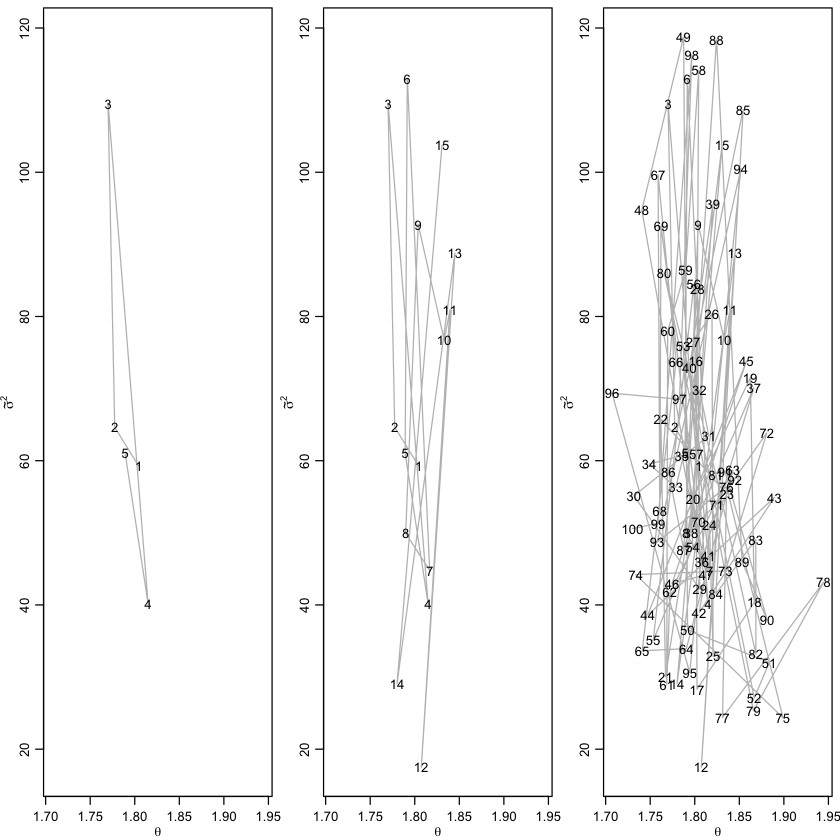

In [8]:
set.seed(1)
S<-5000 # Number of samples
PHI<-matrix(nrow=S,ncol=2)
PHI[1,]<-phi<-c( mean.y, 1/var.y)

## Gibbs sampling algorithm
for(s in 2:S) {

# generate a new theta value from its full conditional
mun<-  ( mu0/t20 + n*mean.y*phi[2] ) / ( 1/t20 + n*phi[2] )
t2n<- 1/( 1/t20 + n*phi[2] )
phi[1]<-rnorm(1, mun, sqrt(t2n) )

# generate a new sigma^2 value from its full conditional
nun<- nu0+n
s2n<- (nu0*s20 + (n-1)*var.y + n*(mean.y-phi[1])^2 ) /nun
phi[2]<- rgamma(1, nun/2, nun*s2n/2)

PHI[s,]<-phi         



                }   

par(mfrow=c(1,3),mar=c(2.75,2.75,.5,.5),mgp=c(1.70,.70,0))
m1<-5
plot( PHI[1:m1,],type="l",xlim=range(PHI[1:100,1]), ylim=range(PHI[1:100,2]),
       lty=1,col="gray",xlab=expression(theta),ylab=expression(tilde(sigma)^2))
text(  PHI[1:m1,1], PHI[1:m1,2], c(1:m1) )

m1<-15
plot( PHI[1:m1,],type="l",xlim=range(PHI[1:100,1]), ylim=range(PHI[1:100,2]),
       lty=1,col="gray",xlab=expression(theta),ylab=expression(tilde(sigma)^2))
text(  PHI[1:m1,1], PHI[1:m1,2], c(1:m1) )

m1<-100
plot( PHI[1:m1,],type="l",xlim=range(PHI[1:100,1]), ylim=range(PHI[1:100,2]),
       lty=1,col="gray",xlab=expression(theta),ylab=expression(tilde(sigma)^2))
text(  PHI[1:m1,1], PHI[1:m1,2], c(1:m1) )

### Three parameters

For the three parameters case, we assume that the prior for $\sigma_0^2\sim \operatorname{gamma}(1,100)$ so the prior mean is given by $\mathbb{E}[\sigma_0^2]=0.01$. Recall that in Lecture 20 Page 94, we proved that

* $\left\{\theta \mid \sigma^{2}, y_{1}, \ldots, y_{n}\right\} \sim \operatorname{normal}\left(\mu_{n}, \tau_{n}^{2}\right)$ with
$$\mu_{n}=\frac{\mu_{0} / \tau_{0}^{2}+n \bar{y} / \sigma^{2}}{1 / \tau_{0}^{2}+n / \sigma^{2}} \text { and } \tau_{n}^{2}=\left(\frac{1}{\tau_{0}^{2}}+\frac{n}{\sigma^{2}}\right)^{-1} .$$

* $\tilde{\sigma}^2=1 / \sigma^2 \sim \operatorname{gamma}\left(\nu_0 / 2,\left(\nu_0 / 2\right) \sigma_0^2\right)$

* $\sigma_0^2 \sim \operatorname{gamma}\left(\nu_0 ; a=1, b=100\right)$.


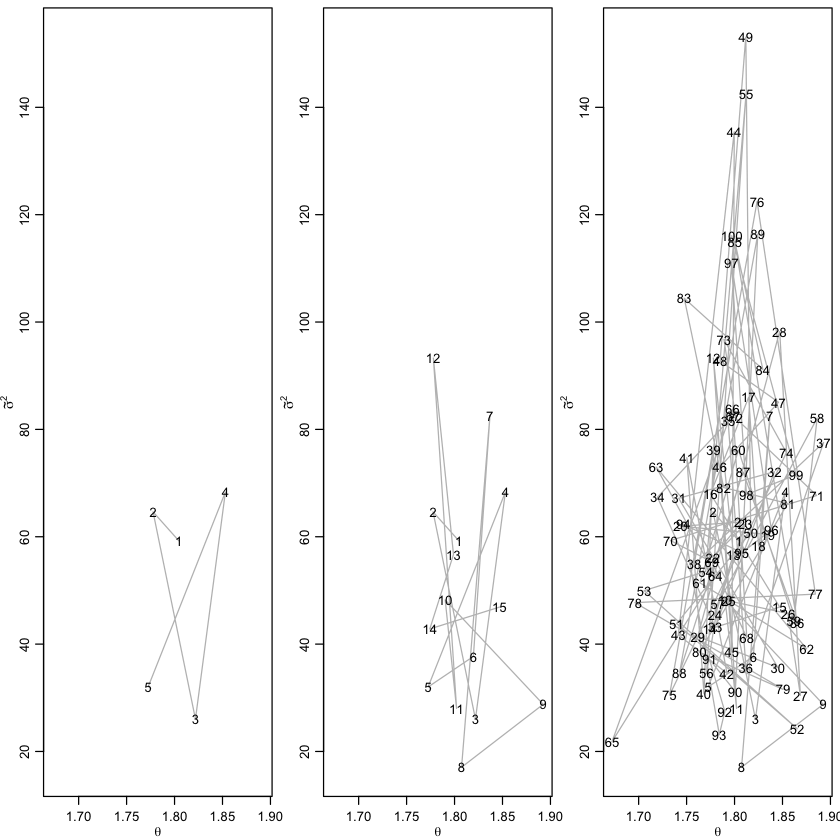

In [9]:
set.seed(1)
S<-5000 # Number of samples
a<-1
b<-100

PHI<-matrix(nrow=S,ncol=3) # New change ncol=2 by ncol=3
PHI[1,]<-phi<-c( mean.y, 1/var.y, 0.01) # New: Include a new starting point 


## Gibbs sampling algorithm

for(s in 2:S) {


# generate a new theta value from its full conditional

mun<-  ( mu0/t20 + n*mean.y*phi[2] ) / ( 1/t20 + n*phi[2] )
t2n<- 1/( 1/t20 + n*phi[2] )


phi[1]<-rnorm(1, mun, sqrt(t2n) )

# generate a new sigma^2 value from its full conditional

nun<- nu0+n
s2n<- (nu0*phi[3] + (n-1)*var.y + n*(mean.y-phi[1])^2 ) /nun

phi[2]<- rgamma(1, shape=nun/2, rate=nun*s2n/2)


# generate a new sigma_0^2 value from its full conditional   # New: include a new full conditional

phi[3] <-  rgamma(1, shape=a + nu0/2, rate=b + (nu0/2)*phi[2])



PHI[s,]<-phi  # Keep the results in this matrix     





                }
                
                
par(mfrow=c(1,3),mar=c(2.75,2.75,.5,.5),mgp=c(1.70,.70,0))
m1<-5
plot( PHI[1:m1,],type="l",xlim=range(PHI[1:100,1]), ylim=range(PHI[1:100,2]),
       lty=1,col="gray",xlab=expression(theta),ylab=expression(tilde(sigma)^2))
text(  PHI[1:m1,1], PHI[1:m1,2], c(1:m1) )

m1<-15
plot( PHI[1:m1,],type="l",xlim=range(PHI[1:100,1]), ylim=range(PHI[1:100,2]),
       lty=1,col="gray",xlab=expression(theta),ylab=expression(tilde(sigma)^2))
text(  PHI[1:m1,1], PHI[1:m1,2], c(1:m1) )

m1<-100
plot( PHI[1:m1,],type="l",xlim=range(PHI[1:100,1]), ylim=range(PHI[1:100,2]),
       lty=1,col="gray",xlab=expression(theta),ylab=expression(tilde(sigma)^2))
text(  PHI[1:m1,1], PHI[1:m1,2], c(1:m1) )